In [4]:
pip install keras==2.15.0

In [5]:
import keras
print(keras.__version__)

2.15.0


In [6]:
import os
os.environ["TF_USE_LEGACY_KERAS"] = "1"

In [7]:
import zipfile
import os

# Definisikan path ke file zip dataset
zip_file = "dataset_gambar.zip"

# Path untuk mengekstrak arsip
extract_dir = "/content/dataset_gambar"

# Ekstrak arsip zip
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List untuk menyimpan data gambar
dataset = []

# Loop melalui file dalam direktori hasil ekstraksi
for file_name in os.listdir(extract_dir):
    file_path = os.path.join(extract_dir, file_name)
    if os.path.isfile(file_path):  # Periksa apakah path mengarah ke sebuah file
        # Lakukan sesuatu dengan file
        dataset.append(file_path)


In [8]:
keras.applications.VGG16(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam

# Definisikan ImageDataGenerator untuk pra-pemrosesan dan augmentasi data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Skalakan nilai piksel ke rentang [0, 1]
    rotation_range=20,  # Rotasi gambar dalam rentang 20 derajat
    width_shift_range=0.2,  # Geser gambar horizontal sebesar 20% lebar gambar
    height_shift_range=0.2,  # Geser gambar vertikal sebesar 20% tinggi gambar
    shear_range=0.2,  # Shearing transformasi sebesar 20 derajat
    zoom_range=0.2,  # Perbesaran gambar sebesar 20%
    horizontal_flip=True)  # Pembalikan gambar horizontal

# Definisikan path ke direktori tempat gambar-gambar pelatihan akan disimpan setelah diekstrak
train_dir = "/content/dataset_gambar"

# Buat generator data pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,  # Gunakan path ke direktori yang baru saja diekstrak
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')  # Mode kategori karena kita melakukan klasifikasi

# Definisikan model
input_layer = Input(shape=(224, 224, 3))
conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(input_layer)
maxpool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(maxpool1)
maxpool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
flatten = Flatten()(maxpool2)
dense1 = Dense(128, activation='relu')(flatten)
output_layer = Dense(3, activation='softmax')(dense1)  # Output 3 kelas
model = Model(inputs=input_layer, outputs=output_layer)

# Compile model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Lakukan pelatihan model
model.fit(train_generator, steps_per_epoch=len(train_generator), epochs=10)


Found 547 images belonging to 1 classes.
Epoch 1/10
18/18 [==============================] - 73s 4s/step - loss: 251.9129 - accuracy: 0.2925
Epoch 2/10
18/18 [==============================] - 57s 3s/step - loss: 977.2523 - accuracy: 0.2925
Epoch 3/10
18/18 [==============================] - 55s 3s/step - loss: 3631.9270 - accuracy: 0.2980
Epoch 4/10
18/18 [==============================] - 55s 3s/step - loss: 13198.0439 - accuracy: 0.2962
Epoch 5/10
18/18 [==============================] - 55s 3s/step - loss: 29299.4961 - accuracy: 0.2925
Epoch 6/10
18/18 [==============================] - 55s 3s/step - loss: 85369.5078 - accuracy: 0.3638
Epoch 7/10
18/18 [==============================] - 56s 3s/step - loss: 318260.4375 - accuracy: 0.3547
Epoch 8/10
18/18 [==============================] - 54s 3s/step - loss: 734124.5000 - accuracy: 0.2943
Epoch 9/10
18/18 [==============================] - 55s 3s/step - loss: 738352.1875 - accuracy: 0.4095
Epoch 10/10
18/18 [========================

Found 547 images belonging to 1 classes.
Found 547 images belonging to 1 classes.
Epoch 1/10
28/28 [==============================] - 50s 2s/step - loss: 0.0263 - accuracy: 0.9671 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/10
28/28 [==============================] - 48s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/10
28/28 [==============================] - 47s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/10
28/28 [==============================] - 47s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
28/28 [==============================] - 46s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/10
28/28 [==============================] - 47s 2s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/10
28/28 [================

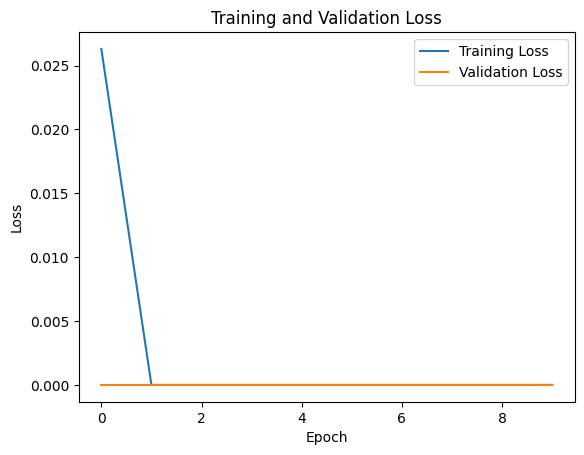

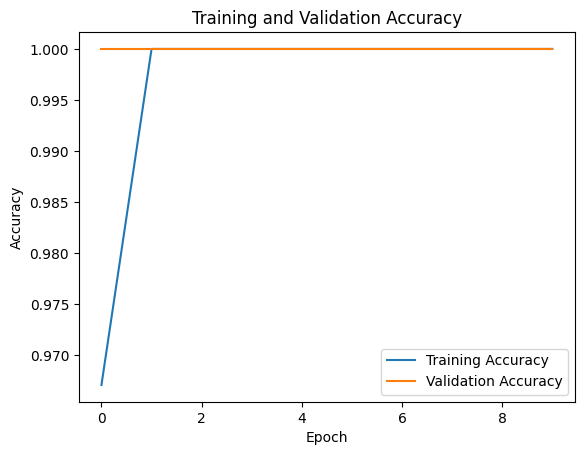

In [24]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

# Define the paths to the training and validation directories
train_dir = "/content/dataset_gambar"
validation_dir = "/content/dataset_gambar"

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Initialize the ImageDataGenerator objects for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Create the training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Create the validation data generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()


In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Buat model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten data gambar menjadi 1D array
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Muat data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisasi data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Latih model
model.fit(x_train, y_train, epochs=5)

# Evaluasi model
model.evaluate(x_test, y_test)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 23s 3ms/step - loss: 0.2980 - accuracy: 0.9162
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1438 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1054 - accuracy: 0.9692
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0826 - accuracy: 0.9750
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9740


[0.08606334030628204, 0.9739999771118164]

Epoch 1/5
1875/1875 [==============================] - 60s 30ms/step - loss: 0.1498 - accuracy: 0.9547 - val_loss: 0.0550 - val_accuracy: 0.9815
Epoch 2/5
1875/1875 [==============================] - 55s 30ms/step - loss: 0.0460 - accuracy: 0.9855 - val_loss: 0.0503 - val_accuracy: 0.9851
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0342 - accuracy: 0.9893 - val_loss: 0.0365 - val_accuracy: 0.9893
Epoch 4/5
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0248 - accuracy: 0.9922 - val_loss: 0.0347 - val_accuracy: 0.9892
Epoch 5/5
1/1 [==============================] - 0s 21ms/step


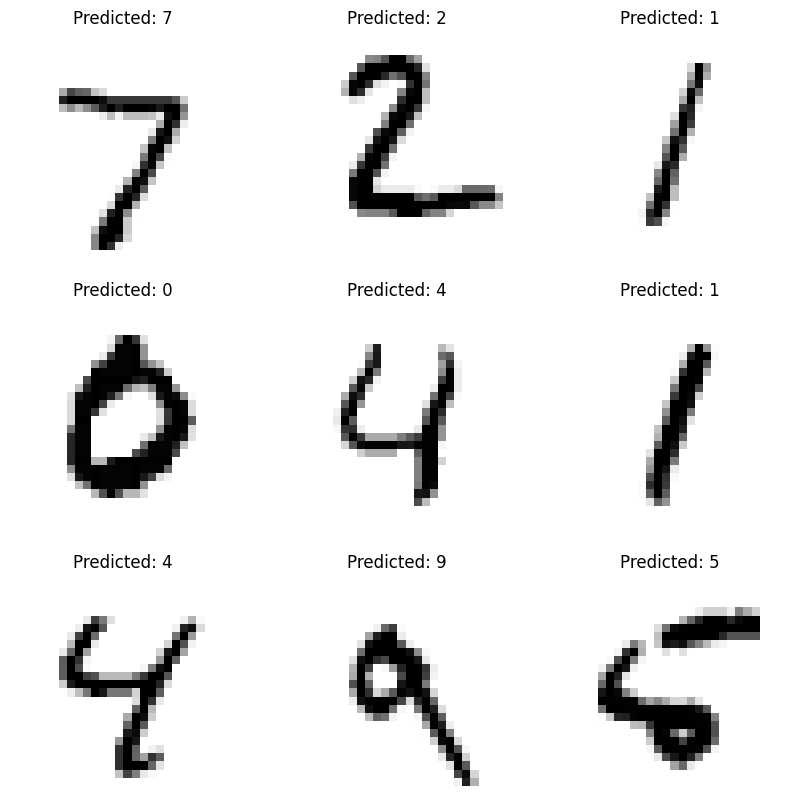

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Define your model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

# Load 9 samples from the test set for visualization
test_dataset = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(9)

# Plot images and predictions
plt.figure(figsize=(10, 10))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().reshape(28, 28), cmap=plt.cm.binary)
        plt.title("Predicted: {}".format(np.argmax(model.predict(images[i:i+1]))))
        plt.axis('off')
